# Getting the data

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_shm_data():
  csv_path = os.path.join('drive', 'MyDrive', 'sample_data', 'shm_data.csv')
  return pd.read_csv(csv_path, index_col=0)

In [ ]:
machinery = get_shm_data()
machinery.head(10)

<ipython-input-1-4dfdf99d188a>:8: DtypeWarning: Columns (14,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(csv_path, index_col=0)


,Sales ID,Sales Price,Machine ID,Model ID,datasource,Auctioneer ID,Year Made,MachineHours CurrentMeter,Usage Band,Sales date,...,Screen Size.1,Stick Length,Thumb,Pattern Changer,Grouser Type,Backhoe Mounting,Blade Type,Travel Possibilities,Differential Type,Steering Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1139255,26500.0,1001274,4605,121,3.0,2004,508.0,Low,12/18/2008 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1139256,21000.0,772701,1937,121,3.0,1993,11540.0,High,8/26/2004 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
7,1139261,27000.0,902002,3539,121,3.0,2001,4883.0,High,11/17/2005 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1139272,21500.0,1036251,36003,121,3.0,2008,302.0,Low,8/27/2009 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
9,1139275,65000.0,1016474,3883,121,3.0,1000,20700.0,Medium,8/9/2007 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


## Discovering data

In [ ]:
machinery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sales ID                   412698 non-null  int64  
 1   Sales Price                412698 non-null  float64
 2   Machine ID                 412698 non-null  int64  
 3   Model ID                   412698 non-null  int64  
 4   datasource                 412698 non-null  int64  
 5   Auctioneer ID              392562 non-null  float64
 6   Year Made                  412698 non-null  int64  
 7   MachineHours CurrentMeter  147504 non-null  float64
 8   Usage Band                 73670 non-null   object 
 9   Sales date                 412698 non-null  object 
 10  Model Description          412698 non-null  object 
 11  Base Model                 412698 non-null  object 
 12  Secondary Description      271971 non-null  object 
 13  Model Series               58

We have a lot of categorical attributes. So we have to transform all of them into numerical values

But firstly let's have a look at the num. values we have:

In [ ]:
machinery.describe()

,Sales ID,Sales Price,Machine ID,Model ID,datasource,Auctioneer ID,Year Made,MachineHours CurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


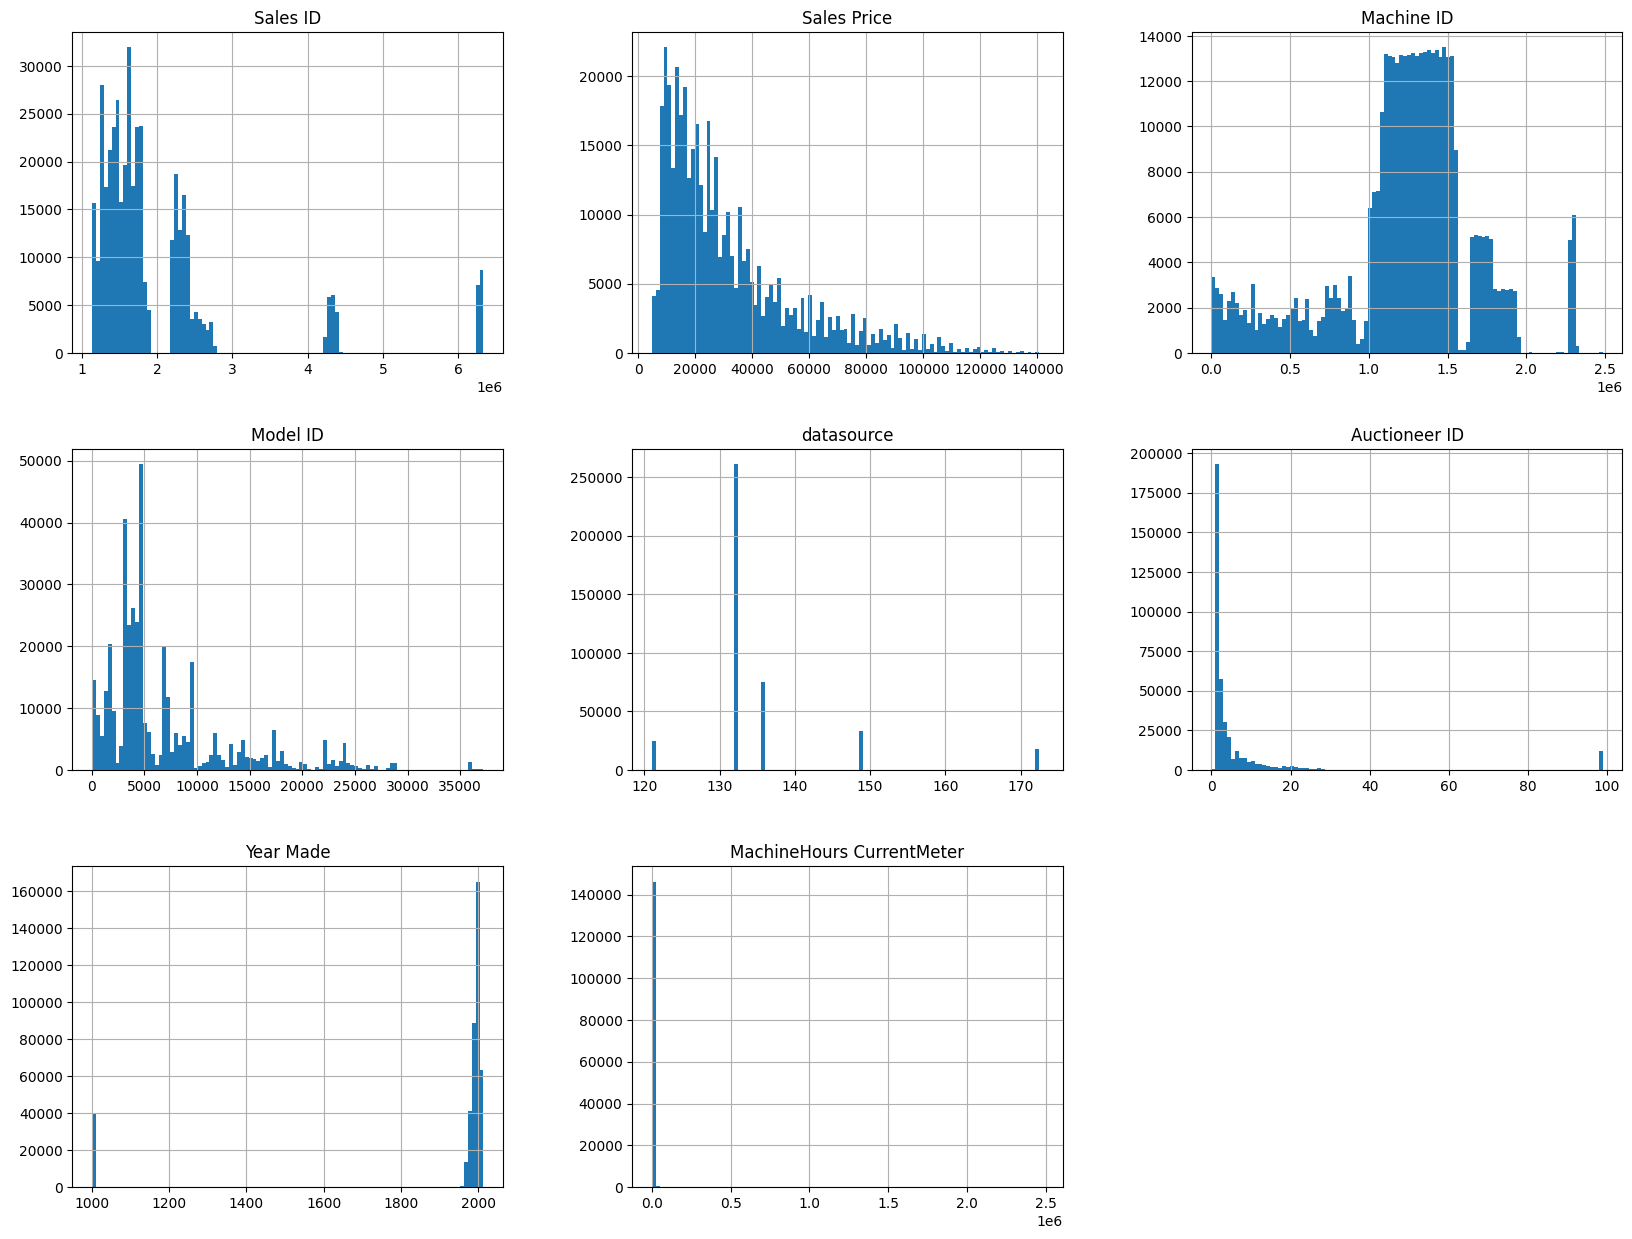

In [ ]:
machinery.hist(bins=100, figsize=(20, 15))
plt.show()

MachineHours CurrentMeter has a weird histogram. That's because of the one case with extraordinary huge value. We know this value from describe function

So let's draw a picture without huge values

`.quantile(0.99)` more or less means that we are not using this 1% with the highest (exeptional) values

<Axes: >

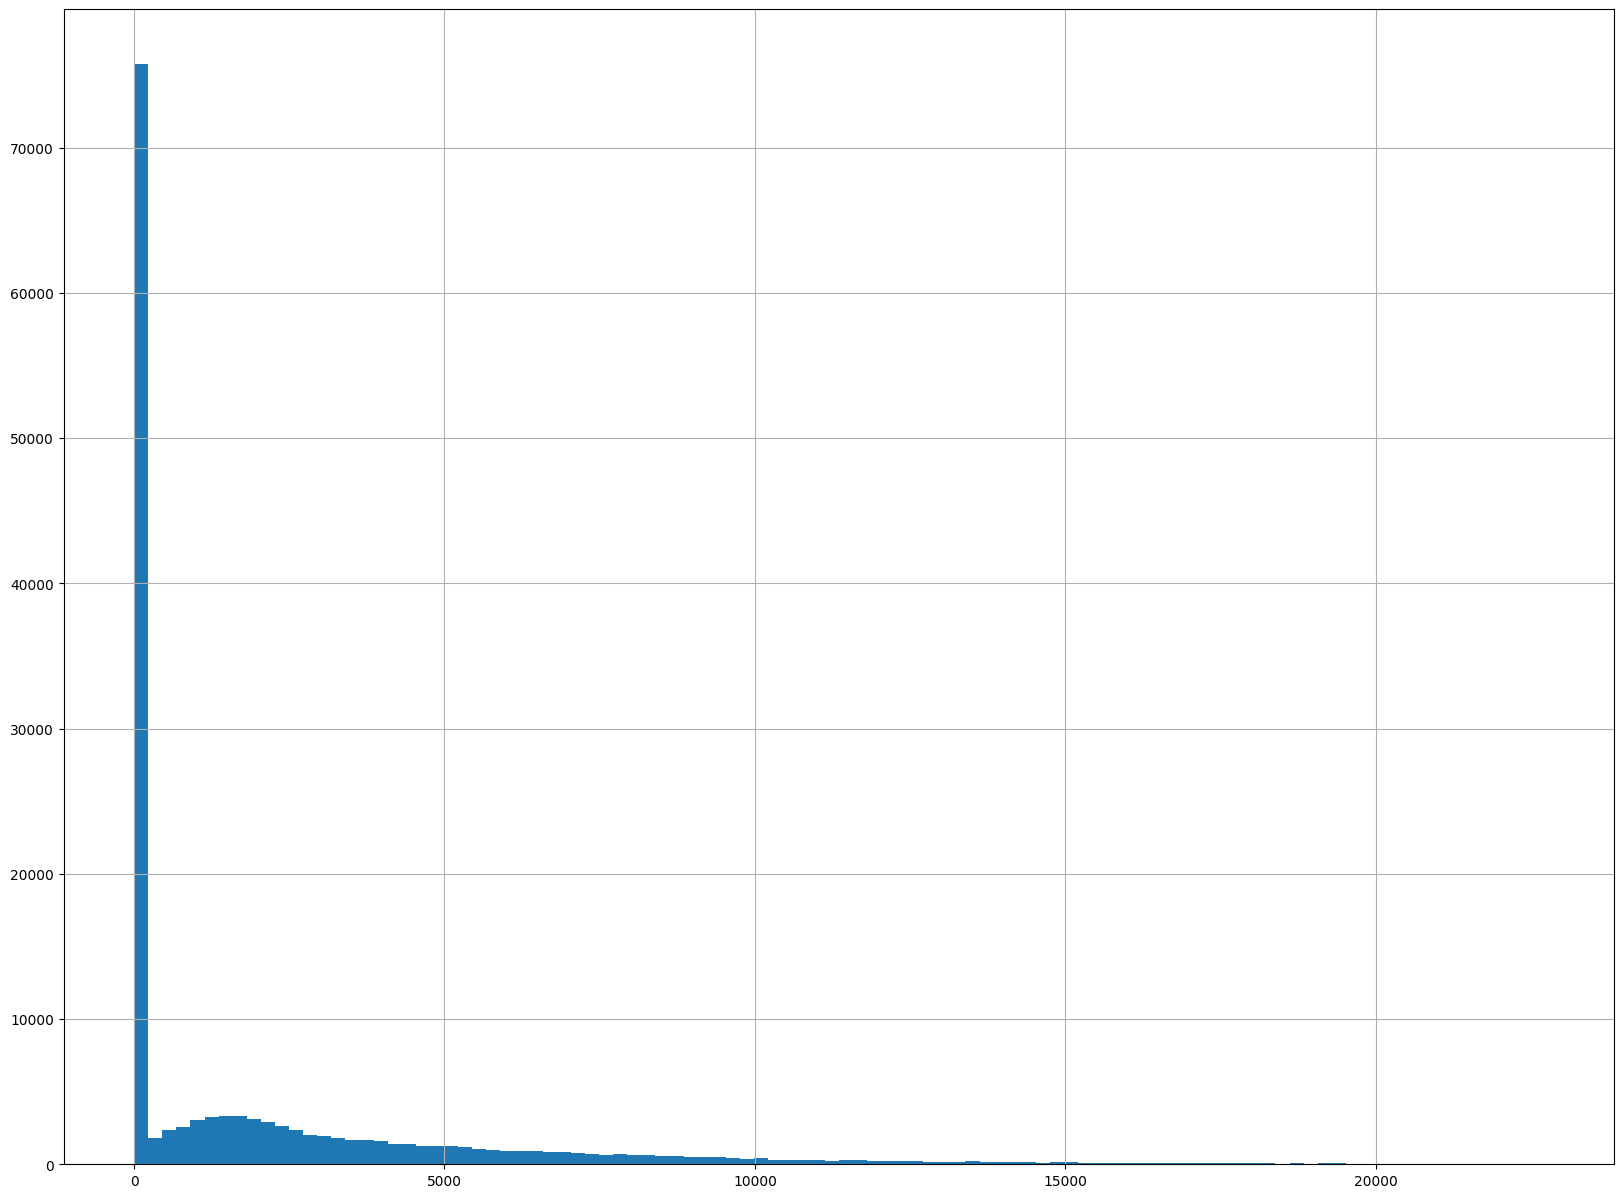

In [ ]:
machinery['MachineHours CurrentMeter'].hist(bins=100, figsize=(20, 15),
                                            range=(machinery['MachineHours CurrentMeter'].min(), machinery['MachineHours CurrentMeter'].quantile(0.99)))

Now let's have a loot into categorical attributes. We will print the table with numbers of times each category occurs. Basing on these numbers we will plot histograms.

**Important note:** NaN values (which make up a significant part in our dataset) are not plotted. However, their amount in the attribute may be calculated using the 1st row of the table.

In [ ]:
for column in machinery.columns.values[8:]:
  print('\n', column, ' - ', machinery[column].count(), '/', machinery.shape[0])
  print('-----------------------')
  print(machinery[column].value_counts(), '\n')
  machinery[column].value_counts().plot(kind='bar', figsize = (24, 16))
  plt.show()

## Splitting (stratified - countries)

Analyzing the plots from the categorical attributes I spotted, that the "Product Group" attribute has no NaN values. Moreover, it corresponds to the "Product Group Description", in which we have the names of the countries. From that, I supposed that "Product Group" means country of origin and, therefore, it's an important attribute for calculating the price of the car. \
So I decided to do stratified sampling, based on the country, where the vehicle was made.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=67)
for train_index, test_index in split.split(machinery, machinery['Product Group']):
  train_set_strat = machinery.loc[train_index]
  test_set_strat = machinery.loc[test_index]

In [ ]:
train_set_strat['Product Group'].value_counts()/len(train_set_strat)

TEX    0.252558
TTT    0.200101
BL     0.197242
WL     0.177409
SSL    0.109066
MG     0.063624
Name: Product Group, dtype: float64

# Exploring data (train set)

In [ ]:
train_set_expl = train_set_strat.copy()

In [ ]:
corr_matrix = train_set_expl.corr()

<ipython-input-11-51cef309f108>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_set_expl.corr()


In [ ]:
corr_matrix

,Sales ID,Sales Price,Machine ID,Model ID,datasource,Auctioneer ID,Year Made,MachineHours CurrentMeter
Sales ID,1.000000,0.021225,0.310083,0.147657,0.769096,-0.003361,0.004409,0.007511
Sales Price,0.021225,1.000000,-0.218688,-0.039675,0.021114,-0.048102,0.155058,0.018688
Machine ID,0.310083,-0.218688,1.000000,0.164715,0.374642,0.006563,-0.053225,-0.002421
Model ID,0.147657,-0.039675,0.164715,1.000000,0.096362,-0.017888,-0.046277,-0.005416
datasource,0.769096,0.021114,0.374642,0.096362,1.000000,-0.018706,0.069903,0.010034
Auctioneer ID,-0.003361,-0.048102,0.006563,-0.017888,-0.018706,1.000000,-0.020317,0.032633
Year Made,0.004409,0.155058,-0.053225,-0.046277,0.069903,-0.020317,1.000000,-0.009124
MachineHours CurrentMeter,0.007511,0.018688,-0.002421,-0.005416,0.010034,0.032633,-0.009124,1.000000


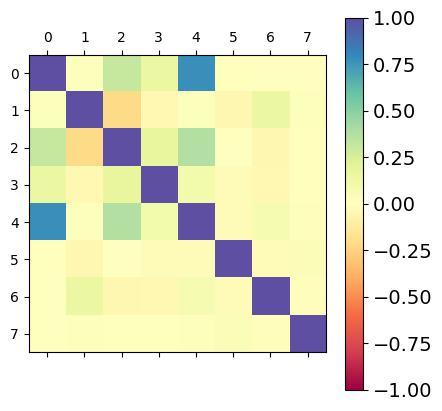

In [ ]:
plt.matshow(corr_matrix, cmap=plt.cm.Spectral, vmin=-1, vmax=1)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

Now it's easy to see, that numerical attributes has almost mo correlation with the pricing

In [ ]:
corr_matrix['Sales Price'].sort_values(ascending=False)

Sales Price                  1.000000
Year Made                    0.155058
Sales ID                     0.021225
datasource                   0.021114
MachineHours CurrentMeter    0.018688
Model ID                    -0.039675
Auctioneer ID               -0.048102
Machine ID                  -0.218688
Name: Sales Price, dtype: float64

So only ***Year Made*** and ***Machine ID*** worth consideration. On the furhter stages we will leave only them from numerical attributes

array([[<Axes: xlabel='Sales Price', ylabel='Sales Price'>,
        <Axes: xlabel='Year Made', ylabel='Sales Price'>,
        <Axes: xlabel='Machine ID', ylabel='Sales Price'>],
       [<Axes: xlabel='Sales Price', ylabel='Year Made'>,
        <Axes: xlabel='Year Made', ylabel='Year Made'>,
        <Axes: xlabel='Machine ID', ylabel='Year Made'>],
       [<Axes: xlabel='Sales Price', ylabel='Machine ID'>,
        <Axes: xlabel='Year Made', ylabel='Machine ID'>,
        <Axes: xlabel='Machine ID', ylabel='Machine ID'>]], dtype=object)

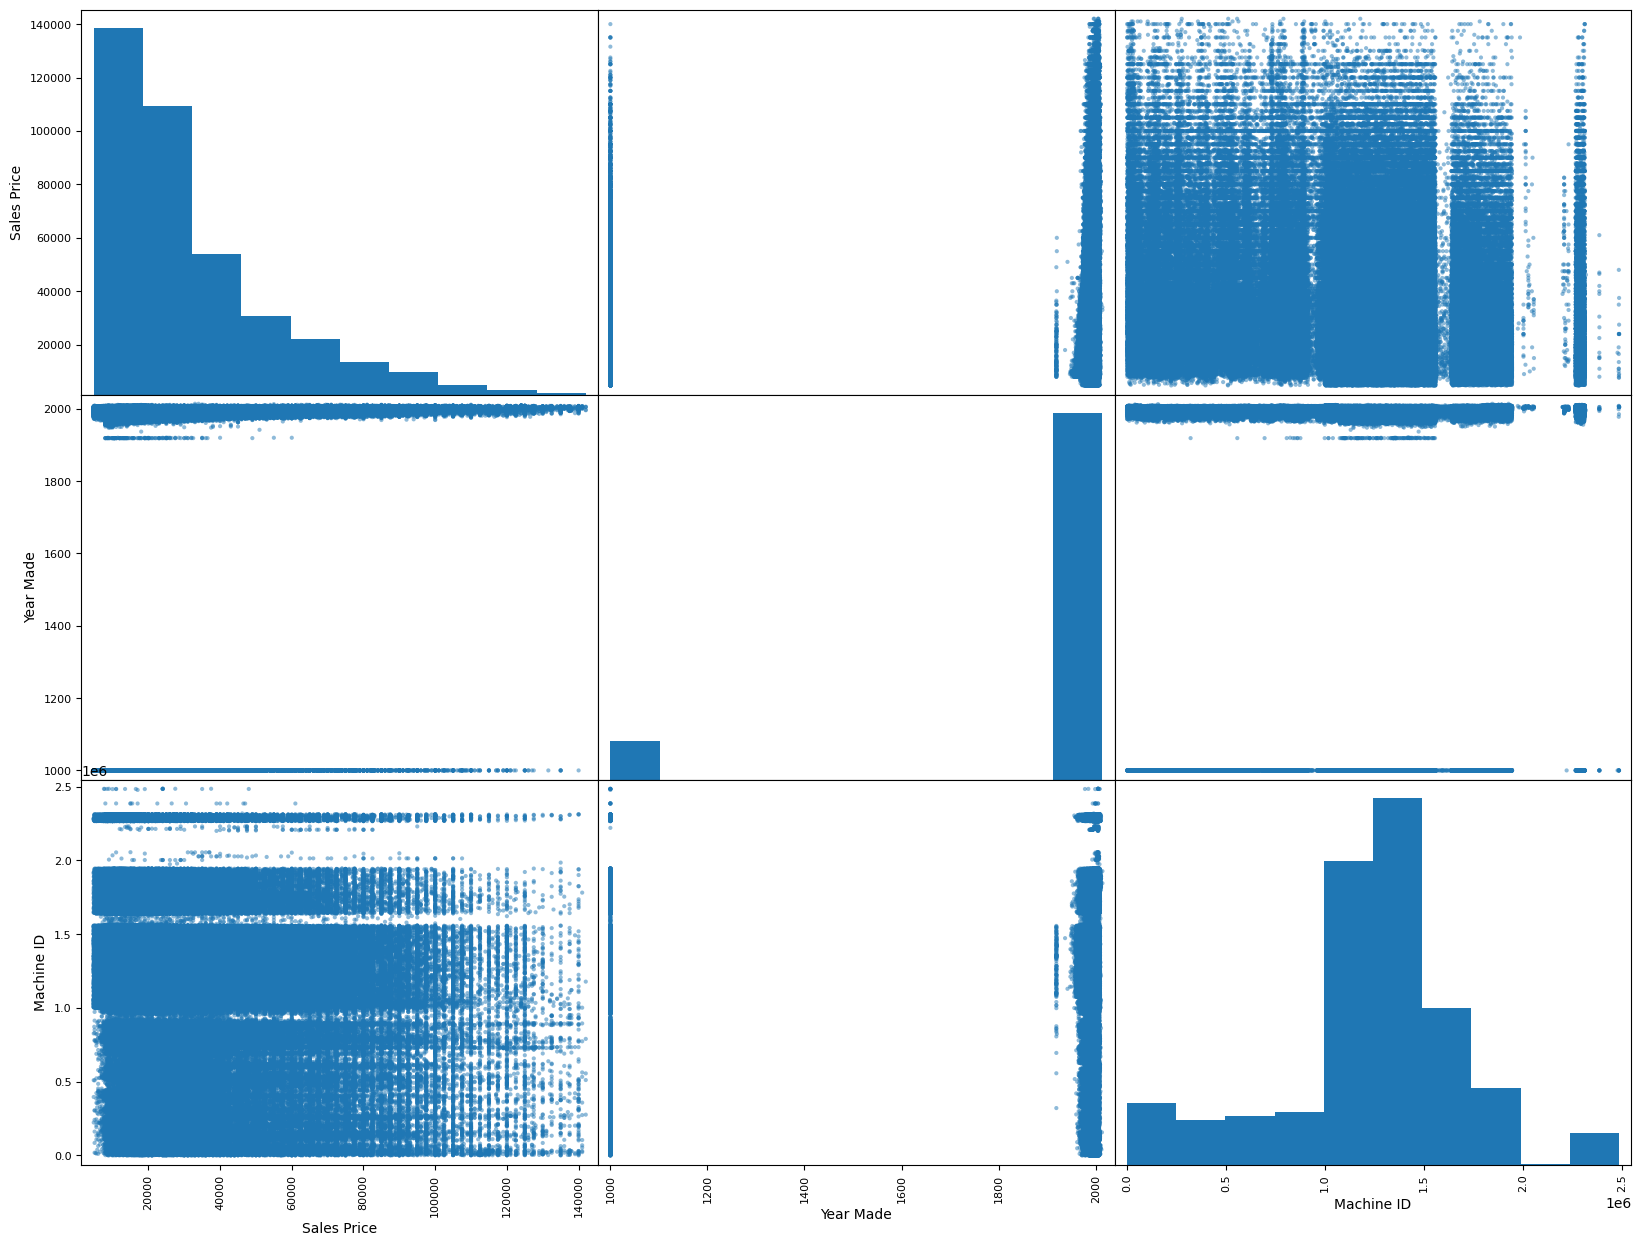

In [ ]:
from pandas.plotting import scatter_matrix

scatter_attributes = ['Sales Price', 'Year Made', 'Machine ID']
scatter_matrix(machinery[scatter_attributes], figsize=(20, 15))

I couldn't believe, that MachineHours CurrentMeter correlates the least with the Sales Prices. So I plotted a scatter matrix to ensure myself

array([[<Axes: xlabel='Sales Price', ylabel='Sales Price'>,
        <Axes: xlabel='MachineHours CurrentMeter', ylabel='Sales Price'>],
       [<Axes: xlabel='Sales Price', ylabel='MachineHours CurrentMeter'>,
        <Axes: xlabel='MachineHours CurrentMeter', ylabel='MachineHours CurrentMeter'>]],
      dtype=object)

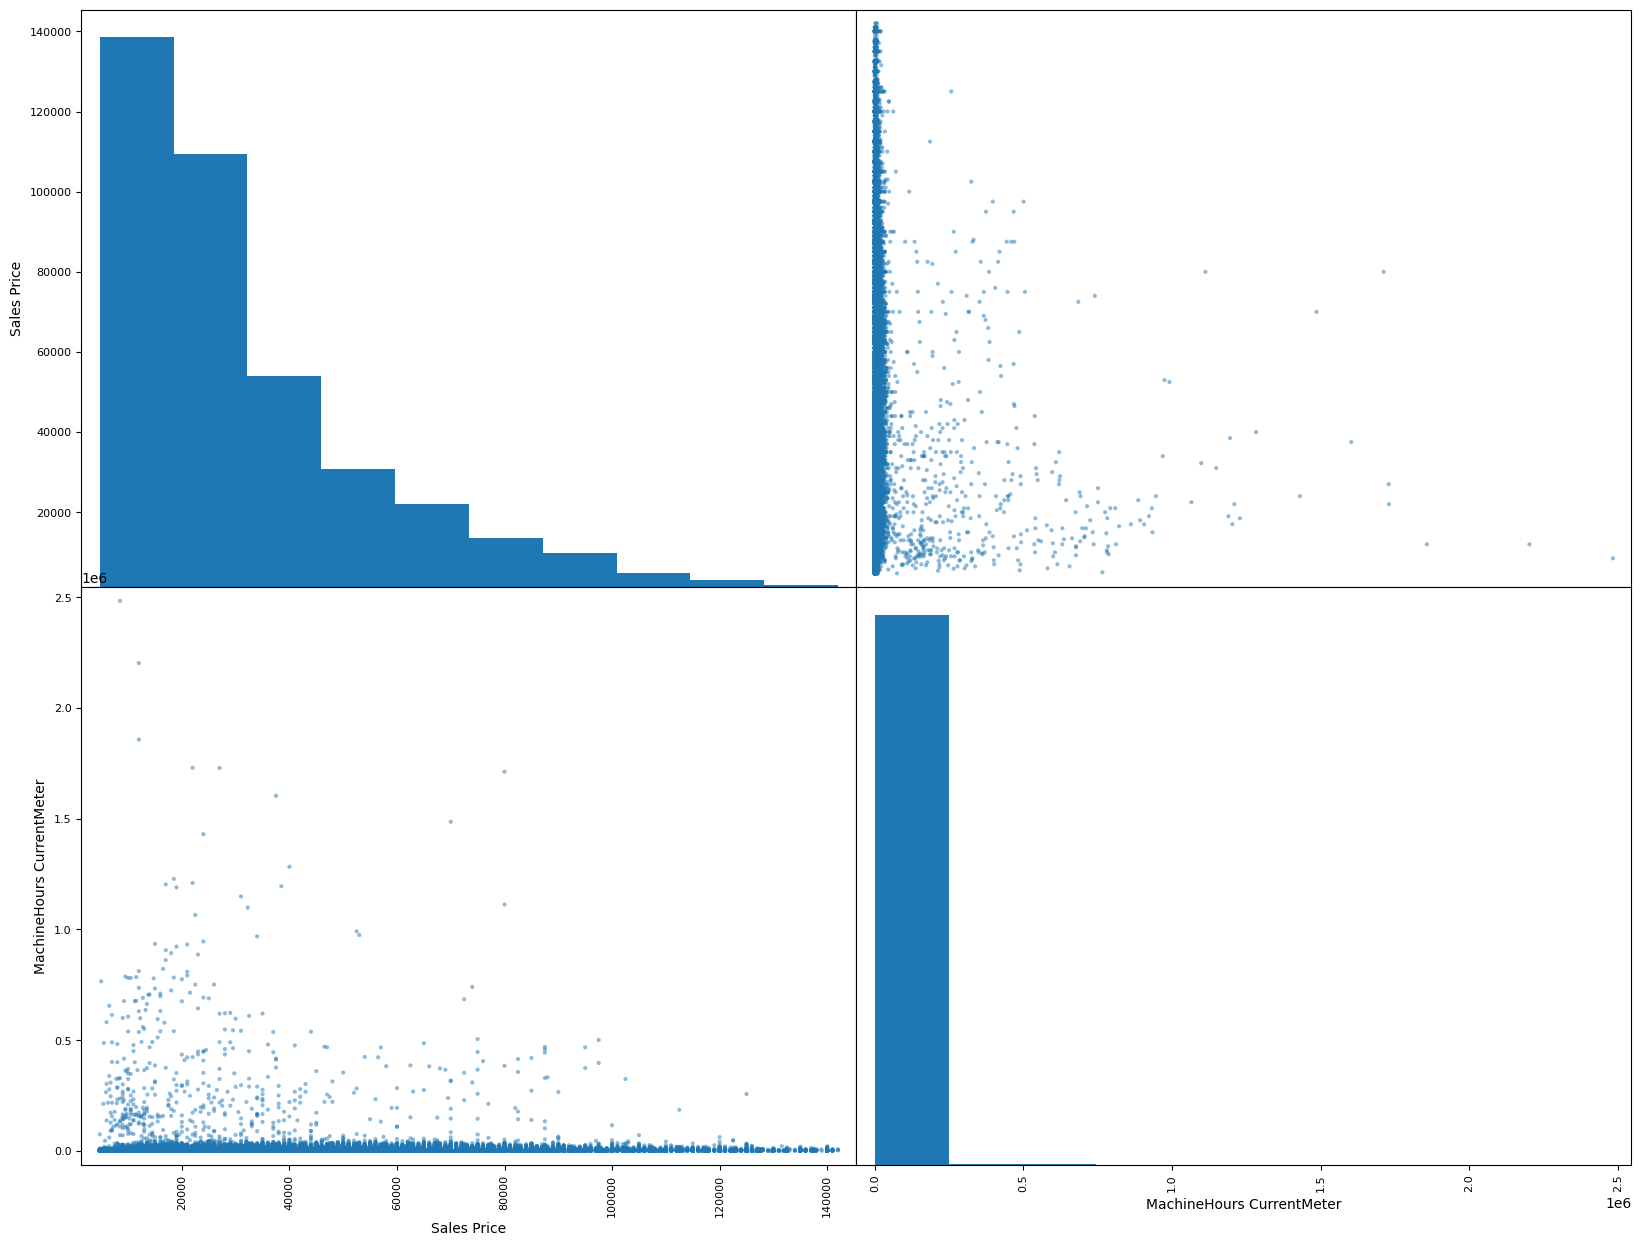

In [ ]:
scatter_matrix(machinery[['Sales Price', 'MachineHours CurrentMeter']], figsize=(20, 15))

# Preparing data

## Cutting the attributes (?)

This section was created to cut the amount of attributes, where the number of classes is 200-300. By implementing that, we whould reduce the amount of attributes in the transformed data from 754 to 350. Unfortunately, this part was not finished due to the issues with the transform method and a lack of time.\
**So, disregad this block (until "Frequency Oriented")**

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

class SignificantObjects(BaseEstimator, TransformerMixin):
  def __init__(self, obj_amount_more_than=0) -> None:
    self.obj_amount_more_than = obj_amount_more_than
  def fit(self, X, y=None):
    X_1 = X.astype(str)
    x = X_1.iloc[:,0].value_counts()
    selected_names = x[x>self.obj_amount_more_than].index.tolist()

    hot_encoder = OneHotEncoder(handle_unknown='ignore')
    hot_encoder.fit(X_1)
    self.hot_encoder_ = hot_encoder

    return self
  def transform(self, X, y=None):
    X_1 = X.astype(str)
    x = X_1.iloc[:,0].value_counts()
    selected_names = x[x>self.obj_amount_more_than].index.tolist()

    X_hot = self.hot_encoder_.transform(X_1)

    X_hot_df = pd.DataFrame(X_hot.toarray(), columns=self.hot_encoder_.categories_[0].tolist())
    X_hot_df_selected = X_hot_df[selected_names]
    return X_hot_df_selected


In [ ]:
from sklearn.compose import ColumnTransformer


many_attr_pipeline = ColumnTransformer([
    ('sec_descr_hot', SignificantObjects(obj_amount_more_than=3000), ['Secondary Description']),
    ('model_series_hot', SignificantObjects(obj_amount_more_than=1000), ['Model Series']),
    ('model_descrip_hot', SignificantObjects(obj_amount_more_than=1000), ['Model Descriptor']),
    ('prod_class_hot', SignificantObjects(obj_amount_more_than=300), ['Product Class Description']),
    ('state_hot', SignificantObjects(obj_amount_more_than=500), ['State of Usage'])
])


In [ ]:
hot_cutter = SignificantObjects(obj_amount_more_than=2000)
model_descr_hot = hot_cutter.transform(train_set_strat[['Model Description']])

AttributeError: ignored

In [ ]:
model_descr_hot

## Frequency oriented

### Main pipelines and transformations

#### Pipeline for frequency encoding

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class FrequencyEncoding(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X: pd.DataFrame, y=None):

    list_new_series=[]

    # calculates frequencies column by column and put resulting
    # series into list to concatenate afterwards
    for column_name in list(X.columns):
      enc_x = (X[column_name].groupby(X[column_name]).size()) / len(X)
      list_new_series.append(X[column_name].apply(lambda x: enc_x[x]))

    return pd.concat(list_new_series, axis=1)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

freq_enc_attribs = ['Model Description', 'Base Model']

freq_enc_pipeline = Pipeline([
    ('freq_enc', FrequencyEncoding()), # calculating frequencies
    ('std_scaler', StandardScaler()) # and scaling them using standartization
])

#### Pipeline for merging same attributes

"Product Group" and "Product Group Description" mean the same. That's why we can get rid of one of them

In [ ]:
# we are crating a dictionary to merge the attributes
# and not lose any information
dict_product_group = {
    "TEX": "UK",
    "TTT": "Japan",
    "BL": "USA",
    "WL": "Germany",
    "SSL": "France",
    "MG": "Brazil"
}

class ProductGroupDelete(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X: pd.DataFrame, y=None):
    series_1 = X.iloc[:, 0]
    series_2 = X.iloc[:, 1]

    # iterating throug values of the attribute and filling
    # missing ones if we have information in 2nd attribute
    for index2, value2 in series_2.items():
      if value2 is None and series_1[index2] is not None:
        value2 = dict_product_group[series_1[index2]]

    return pd.DataFrame(series_2)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

merge_attribs = ['Product Group', 'Product Group Description']

merge_pipeline = Pipeline([
    ('product_group_delete', ProductGroupDelete()), # safely merging
    ('merge_hot', OneHotEncoder()) # and transforming
])

#### General pipelines for categorical attributes

In [ ]:
# This class will be applied to the DataFrame with
# all categorical attributes. It will replace
# all mistakes in Excel ('#Name?') or NaN values
# with "None or Uncpecified" value, which is popular
# in given dataset.
class FillNone(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X: pd.DataFrame, y=None):
    X_1 = X.replace(to_replace='#NAME?', value="None or Unspecified")
    return X_1.fillna(value="None or Unspecified")

Here we assigning the list, which will be used in the ColumnTransformer

In [ ]:
num_attribs = ['Year Made', 'Machine ID']
merge_attribs = ['Product Group', 'Product Group Description']
freq_enc_attribs = ['Model Description', 'Base Model']

one_hot_attribs = list(train_set_strat.columns.values)[8:]
one_hot_attribs.remove("Sales date")
for attrib in merge_attribs: one_hot_attribs.remove(attrib)
for attrib in freq_enc_attribs: one_hot_attribs.remove(attrib)

cat_attribs = freq_enc_attribs + merge_attribs + one_hot_attribs

Here we have two main pipelines, which splitting the DataFrame into the smaller ones and apply needed transformations to each

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# In the categorical attributes we have numbers (by mistake,
# probably). So we change the type of every value to string
# so that OneHotEncoder faces no mistakes.
class StringTransAndHotEncoder(BaseEstimator, TransformerMixin):
  def fit(self, X: pd.DataFrame, y=None):
    X_1 = X.astype(str)
    hot_encoder = OneHotEncoder(handle_unknown='ignore')
    hot_encoder.fit(X_1)
    self.hot_encoder_ = hot_encoder
    return self
  def transform(self, X: pd.DataFrame, y=None):
    X_1 = X.astype(str)
    return self.hot_encoder_.transform(X_1)

categorical_specific_trans = ColumnTransformer([
    ('freq_enc', freq_enc_pipeline, freq_enc_attribs),
    ('merge', merge_pipeline, merge_attribs),
    ('one_hot_encod', StringTransAndHotEncoder(), one_hot_attribs),
])

categorical_pipeline = Pipeline([
    ('fill_none', FillNone()),
    ('column_specific', categorical_specific_trans)
])


#### Functions for full data processing

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

def train_data_preparation(X: pd.DataFrame):
  X_num = X[num_attribs]
  X_cat = X[cat_attribs]

  X_num_1 = std_scaler.fit_transform(X_num)

  X_cat_1 = categorical_pipeline.fit_transform(X_cat).toarray()

  new_arrays = [X_num_1, X_cat_1]
  X_1 = np.concatenate(new_arrays, axis=1)

  return X_1

Reindexing function is meant to reindex input dataset so that we concatenate it with machinery dataset with no overlapping. That's why in the `input_data_preparation ` we use `machinery.shape[0]` as `start_from` value

In [ ]:
def reindexing(frame: pd.DataFrame, start_from):
  indx_now = list(frame.index.values)
  indx_needed  = range(start_from, start_from+frame.shape[0])
  rename_dict = dict()
  for now, needed in zip(indx_now, indx_needed):
    rename_dict[now] = needed

  return frame.rename(index=rename_dict)

As we used Frequency Encoding for the parameters of the output dataset for ML model, every time we want to transform the test or input data we have to do it with the given dataset (`machinery`). That's why function `input_data_transformation` concatenate the DataFrames and split them again at the very end.

In [ ]:
def input_data_preparation(X: pd.DataFrame):
  n_rows = machinery.shape[0]
  X_1 = reindexing(frame=X, start_from=n_rows)

  dataframes = [machinery, X_1]
  X_comb = pd.concat(dataframes)

  X_num = X_comb[num_attribs]
  X_cat = X_comb[cat_attribs]

  X_num_1 = std_scaler.transform(X_num)

  X_cat_1 = categorical_pipeline.transform(X_cat).toarray()

  new_arrays = [X_num_1, X_cat_1]
  return np.concatenate(new_arrays, axis=1)[n_rows:]

## Transfoming data for the ML algorithm

In [ ]:
from scipy import sparse

machinery_prepared = train_data_preparation(train_set_strat)
machinery_prepared_sparse = sparse.csr_matrix(machinery_prepared)
machinery_labels = train_set_strat["Sales Price"].copy()

In [ ]:
machinery_prepared[0]

array([ 0.32099701, -1.85878611, -0.20669587,  0.31622916,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.  

In [ ]:
machinery_prepared_sparse

<330158x754 sparse matrix of type '<class 'numpy.float64'>'
	with 14857110 stored elements in Compressed Sparse Row format>

## Testsing for matching num. of attr.

In this small section I am testing whether the `train_data_preparation` and `input_data_preparation` output the same amount of attributes

In [ ]:
check_input = machinery.iloc[:5]

In [ ]:
input_prepared_test = input_data_preparation(check_input)

In [ ]:
input_prepared_test.shape

# Choosing model

## Sparse Matrix or Array?

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(machinery_prepared_sparse, machinery_labels)

LinearRegression()

In [ ]:
some_data = train_set_strat.head(5)
some_data_prepared = sparse.csr_matrix(input_data_preparation(some_data))
some_labels = machinery_labels.head(5)

In [ ]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [52367.24311783 49771.88719136 18649.48406699 53902.33934944
 79603.68270097]


In [ ]:
print("Labels:", list(some_labels))

Labels: [66000.0, 72500.0, 9250.0, 95000.0, 47000.0]


In [ ]:
lin_reg_array = LinearRegression()
lin_reg.fit(machinery_prepared, machinery_labels)

LinearRegression()

In [ ]:
some_data_arr = train_set_strat.head(5)
some_data_prepared_arr = input_data_preparation(some_data)
some_labels_arr = machinery_labels.head(5)

In [ ]:
print("Predictions:", lin_reg.predict(some_data_prepared_arr))

Predictions: [52464. 49856. 18632. 53832. 79696.]


In [ ]:
from sklearn.metrics import mean_squared_error

lin_predictions = lin_reg.predict(machinery_prepared_sparse)
lin_mse = mean_squared_error(machinery_labels, lin_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

14061.872794351322

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def scores_table(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Standard deviation: ", scores.std())

###Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [ ]:
in_reg_scores_mse = cross_val_score(lin_reg,
                                      machinery_prepared_sparse,
                                      machinery_labels,
                                      scoring="neg_mean_squared_error", cv=5)

In [ ]:
lin_reg_scores_mse = in_reg_scores_mse
lin_reg_scores_rmse = np.sqrt(-lin_reg_scores_mse)

print("Linear Regression results \n",
      '-----------------------------')
scores_table(lin_reg_scores_rmse)

Linear Regression results 
 -----------------------------
Scores:  [14076.82773123 14204.64882837 14163.12018439 13992.26468838
 14065.3075009 ]
Mean:  14100.433786654705
Standard deviation:  75.20906196334401


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg_3 = RandomForestRegressor(n_estimators=3)

In [ ]:
forest_reg_3_scores_mse = cross_val_score(forest_reg_3,
                                        machinery_prepared_sparse,
                                        machinery_labels,
                                        scoring="neg_mean_squared_error", cv=5)

In [ ]:
forest_reg_3_scores_rmse = np.sqrt(-forest_reg_3_scores_mse)

print("Random Forest Regression results \n",
      '-----------------------------')
scores_table(forest_reg_3_scores_rmse)

Random Forest Regression results 
 -----------------------------
Scores:  [11972.20032645 11992.27172742 12078.81968351 11836.13299589
 11891.53026597]
Mean:  11954.190999848046
Standard deviation:  83.8699544749972


### Elastic-Net

In [ ]:
from sklearn.linear_model import ElasticNet

net = ElasticNet()

In [ ]:
net_scores_mse = cross_val_score(net,
                                  machinery_prepared_sparse,
                                  machinery_labels,
                                  scoring="neg_mean_squared_error", cv=5)

In [ ]:
net_scores_rmse = np.sqrt(-net_scores_mse)

print("Elastic Net results \n",
      '-----------------------------')
scores_table(net_scores_rmse)

Elastic Net results 
 -----------------------------
Scores:  [18000.57752039 18051.13292172 18075.85389508 17862.16973872
 17897.61612598]
Mean:  17977.470040377666
Standard deviation:  84.0361419801873


### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()

In [ ]:
lasso_scores_mse = cross_val_score(lasso_reg,
                                    machinery_prepared_sparse,
                                    machinery_labels,
                                    scoring="neg_mean_squared_error", cv=5)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2299541491016.383, tolerance: 14128321059.127878
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2026747773664.1016, tolerance: 14125082712.651476
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2671748419261.4453, tolerance: 14112649501.69883
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: Converge

In [ ]:
lasso_scores_rmse = np.sqrt(-lasso_scores_mse)

print("Lasso Regression results \n",
      '-----------------------------')
scores_table(lasso_scores_rmse)

Lasso Regression results 
 -----------------------------
Scores:  [14097.77780027 14236.00421576 14205.14912012 14028.15814868
 14099.01333325]
Mean:  14133.220523614418
Standard deviation:  76.42333610072549


# Fine-tuning the model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
    {'n_estimators': [5, 10, 15], 'max_features': [10, 15]}
]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

In [ ]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [ ]:
grid_search.fit(machinery_prepared_sparse, machinery_labels)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [10, 15],
                          'n_estimators': [5, 10, 15]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 15, 'n_estimators': 15}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=15, n_estimators=15)

In [ ]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
  print(np.sqrt(-mean_score), params)

12280.265511955593 {'max_features': 10, 'n_estimators': 5}
11633.947083479274 {'max_features': 10, 'n_estimators': 10}
11449.565814192632 {'max_features': 10, 'n_estimators': 15}
12147.055170283971 {'max_features': 15, 'n_estimators': 5}
11550.363190431546 {'max_features': 15, 'n_estimators': 10}
11348.174728111391 {'max_features': 15, 'n_estimators': 15}


In [ ]:
param_grid_2 = [
    {'n_estimators': [20, 25], 'max_features': [15, 20]}
]

In [ ]:
grid_search_2 = GridSearchCV(forest_reg, param_grid_2, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [ ]:
grid_search_2.fit(machinery_prepared_sparse, machinery_labels)

cv_res = grid_search_2.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
  print(np.sqrt(-mean_score), params)

11250.612666271614 {'max_features': 15, 'n_estimators': 20}
11183.69205665952 {'max_features': 15, 'n_estimators': 25}
11206.700456257202 {'max_features': 20, 'n_estimators': 20}
11118.403564251419 {'max_features': 20, 'n_estimators': 25}


In [ ]:
grid_search_2.best_params_

{'max_features': 20, 'n_estimators': 25}

In [ ]:
cv_res = grid_search_2.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
  print(np.sqrt(-mean_score), params)

In [ ]:
param_grid_3 = [
    {'n_estimators': [30, 40], 'max_features': [20, 25]}
]

In [ ]:
grid_search_3 = GridSearchCV(forest_reg, param_grid_3, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [ ]:
grid_search_3.fit(machinery_prepared_sparse, machinery_labels)

cv_res = grid_search_3.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
  print(np.sqrt(-mean_score), params)

11081.242059547085 {'max_features': 20, 'n_estimators': 30}
11012.064677368147 {'max_features': 20, 'n_estimators': 40}
11030.126743359431 {'max_features': 25, 'n_estimators': 30}
10972.360385863236 {'max_features': 25, 'n_estimators': 40}


# Evaluation of the last model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

final_model = RandomForestRegressor(max_features=25, n_estimators=40)

In [ ]:
final_model.fit(machinery_prepared_sparse, machinery_labels)

RandomForestRegressor(max_features=25, n_estimators=40)

In [ ]:
machinery_test = input_data_preparation(test_set_strat)
machinery_test_labels = test_set_strat["Sales Price"].copy()

In [ ]:
final_predictions = final_model.predict(machinery_test)

In [ ]:
from sklearn.metrics import mean_squared_error

final_mse = mean_squared_error(machinery_test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
print('RMSE:', final_rmse)

RMSE: 10579.595837618375


95% confidence interval

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - machinery_test_labels) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
        loc=squared_errors.mean(),
        scale=stats.sem(squared_errors)))

array([10479.97066938, 10678.2915742 ])

# Download the model

In [30]:
import joblib

In [32]:
joblib.dump(final_model, "cars_price_model.pkl")

['cars_price_model.pkl']